In [161]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [162]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14
data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

X = data.values[:, :-1]
y = data.values[:, -1:]
y = np.clip(y, a_min=0, a_max=1) # Clip values in the array to be between 0 and 1, both inclusive

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features
    
# a few examples from the dataset 
data.head()

,age,sex,chestPainType,restingBP,serumCholesterol,fastingBloodSugar,restingEcg,maxHeartRate,exerciseInducedAngina,stDepression,stSlope,majorVessels,thalassemia,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [163]:
data.describe()

,age,sex,chestPainType,restingBP,serumCholesterol,fastingBloodSugar,restingEcg,maxHeartRate,exerciseInducedAngina,stDepression,stSlope,majorVessels,thalassemia,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [164]:
print(data.dtypes)

age                      float64
sex                      float64
chestPainType            float64
restingBP                float64
serumCholesterol         float64
fastingBloodSugar        float64
restingEcg               float64
maxHeartRate             float64
exerciseInducedAngina    float64
stDepression             float64
stSlope                  float64
majorVessels             float64
thalassemia              float64
diagnosis                  int64
dtype: object


In [165]:
# Gender distribution
gender = data.values[:, 1]
maleCount = np.count_nonzero(gender == 1)
percentageMales = maleCount / len(gender) * 100
print(f"Males: {round(percentageMales)}% ({maleCount}/{gender.shape[0]})")
femaleCount = gender.shape[0] - maleCount
percentageFemales = 100 - percentageMales
print(f"Females: {round(percentageFemales)}% ({femaleCount}/{gender.shape[0]})")


Males: 68% (201/297)
Females: 32% (96/297)


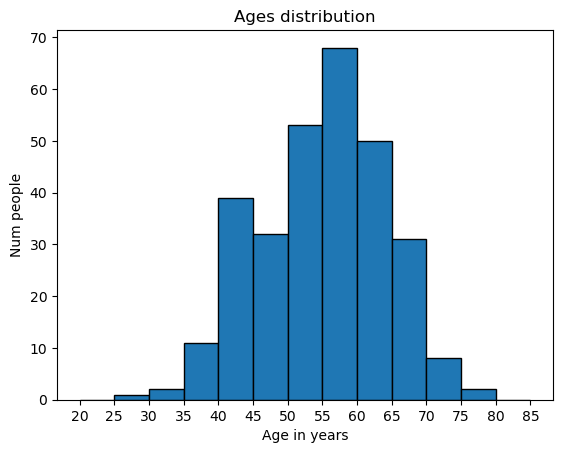

In [166]:
# Ages distribution
bins = range(20, 90, 5) # Define 5 year intervals (last arg) from 20 to 85
plt.hist(data.values[:,0], bins=bins, edgecolor="black")
plt.xlabel("Age in years")
plt.ylabel("Num people")
plt.xticks(bins)
plt.title("Ages distribution")
plt.show()

# Non regularized logistic regression

In [167]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(theta, X, y):
    # Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    
    #number of training examples 
    m = len(y)
    
    #vector of the model predictions for all training examples   
    h = sigmoid(np.dot(X, theta))
         
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))

    #cost function
    cost = 1/m * sum(error)
       
    #vector of gradients of all model parameters theta   
    grad = 1/m * np.dot(X.transpose(),(h - y))
    
    return cost[0] , grad

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean)/ std
    
    return X_norm , mean , std


In [168]:
#Run featureNormalization to normalize X, store the means and stds.

X_norm, X_mean, X_std = featureNormalization(X)

#After normalizing the features, add an extra column of 1's corresponding to x0 = 1.
X_norm= np.append(np.ones((X_norm.shape[0], 1)), X_norm, axis=1)


# Inicialize vector theta = 0
n_size = (data.shape[1], 1)
initial_theta = np.zeros(n_size)

#Run costFunction
cost, grad= costFunction(initial_theta, X_norm, y)

print("Cost of initial theta is",round(cost,3) )   
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693
Gradient at initial theta (zeros): [[ 0.03872054]
 [-0.11319662]
 [-0.13881522]
 [-0.2038583 ]
 [-0.07651454]
 [-0.04002183]
 [-0.00157866]
 [-0.08292197]
 [ 0.21127216]
 [-0.21004507]
 [-0.2113893 ]
 [-0.16602447]
 [-0.23089882]
 [-0.26252902]]


In [169]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #number of training examples
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        theta -= alpha * grad
        J_history.append(cost)
    
    return theta , J_history

In [184]:
theta , J_history = gradientDescent(X_norm, y, initial_theta, 0.5, 5000)

print("Theta optimized by gradient descent:",theta)

print("The cost for the optimized theta:",round(J_history[-1],3))

Theta optimized by gradient descent: [[-0.06875875]
 [-0.12796138]
 [ 0.61367059]
 [ 0.55472475]
 [ 0.42637   ]
 [ 0.25930191]
 [-0.35959244]
 [ 0.2434953 ]
 [-0.47329674]
 [ 0.43431445]
 [ 0.28799664]
 [ 0.3517782 ]
 [ 1.18833707]
 [ 0.6656411 ]]
The cost for the optimized theta: 0.345


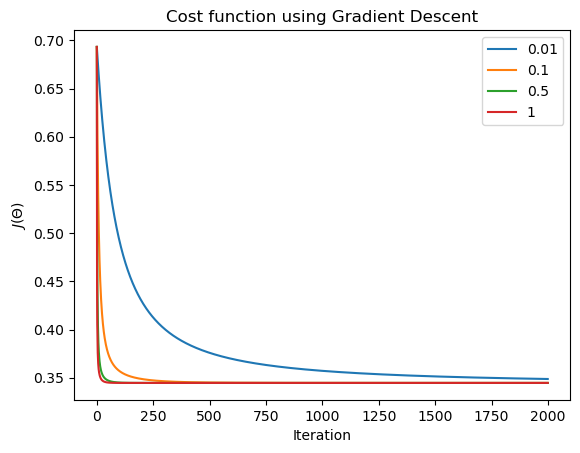

In [185]:
# Plotting cost function using gradient descent

alphas=[0.01, 0.1, 0.5, 1] # learning rates
for alpha in alphas:
    initial_theta = np.zeros(n_size)
    iterations = 2000
    _, J_history = gradientDescent(X_norm, y, initial_theta, alpha, iterations)
    plt.plot(range(iterations), J_history, label = alpha)
    
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend()
plt.show()

In [186]:
# Prediction

x_test = np.array([55.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   140.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   3.0, # majorVessels
                   6.0]) # thalassemia
assert x_test.shape[0] == n
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(initial_theta))
hasHeartDisease = prob[0] > 0.5
if hasHeartDisease:
    strHasHeartDisease = "has heart disease"
else:
    strHasHeartDisease = "no heart disease"
print("Prediction " + str(prob[0]) + " => " + strHasHeartDisease)

x_test = np.array([55.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   140.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   2.0, # majorVessels
                   6.0]) # thalassemia
assert x_test.shape[0] == n
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(initial_theta))
hasHeartDisease = prob[0] > 0.5
if hasHeartDisease:
    strHasHeartDisease = "has heart disease"
else:
    strHasHeartDisease = "no heart disease"
print("Prediction " + str(prob[0]) + " => " + strHasHeartDisease)

Prediction 0.576494231162356 => has heart disease
Prediction 0.2770143008756667 => no heart disease


In [187]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X_norm.dot(theta)
    
    return predictions>0

In [188]:
p=classifierPredict(theta,X)
print("Train Accuracy:", round((sum(p==y)[0] / X.shape[0])*100, 2),"%")

Train Accuracy: 84.85 %


# Regularized Logistic Regression